# Analysis

## input data

In [15]:
from auth import sp
import pandas as pd
import time

# Get user's playlists
playlists = sp.current_user_playlists()

# Get the tracks from the playlists in the "Rated" folder
tracks = []
for playlist in playlists['items']:
    if playlist['name'] in ["0.0", "0.5", "1.0", "1.5", "2.0", "2.5", "3.0", "3.5", "4.0", "4.5", "5.0"]:
        playlist_id = playlist['id']
        playlist_tracks = sp.playlist_tracks(playlist_id)
        track_ids = [item['track']['id'] for item in playlist_tracks['items']]
        
        # Get audio features for each track
        num_tracks_to_fetch = 100  # Maximum number of tracks to fetch at once
        for i in range(0, len(track_ids), num_tracks_to_fetch):
            audio_features_list = sp.audio_features(track_ids[i:i+num_tracks_to_fetch])
            
            # Implement rate limiting
            time.sleep(1)  # Delay for 1 second between requests
            
            for track, audio_features in zip(playlist_tracks['items'][i:i+num_tracks_to_fetch], audio_features_list):
                track = track['track']
                # Merge track and its audio features
                track.update(audio_features)
                # Add rating to track
                track['rating'] = float(playlist['name'])  # Convert the playlist name to float and use it as the rating
                tracks.append(track)
                print(f"{i}/{len(track_ids)} tracks done")
        print(f"Playlist {playlist['name']} done")

# save tracks to csv
df = pd.DataFrame(tracks)
df.to_csv('rated.csv')


0/1 tracks done
Playlist 1.0 done
0/2 tracks done
0/2 tracks done
Playlist 1.5 done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks done
0/67 tracks don

## output data

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
try:
    tracks_df = pd.read_csv('rated.csv')
except FileNotFoundError:
    print("Error: 'rated.csv' not found.")
    exit()

# Preprocess data
tracks_df.dropna(inplace=True)  # Drop rows with missing values
tracks_df = pd.get_dummies(tracks_df)  # One-hot encode categorical data

# Define your target variable
target_column = 'rating'  # Replace this with the column that represents the rating of a track

# Split data into features (X) and target variable (y)
X = tracks_df.drop(target_column, axis=1)
y = tracks_df[target_column]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 7]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Train model with best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Make predictions
predictions = best_rf.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2 Score): {r2}')


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Mean Absolute Error (MAE): 0.05791044776119402
Mean Squared Error (MSE): 0.06007164179104477
R-squared (R2 Score): 0.8551763694951665


## visualisations

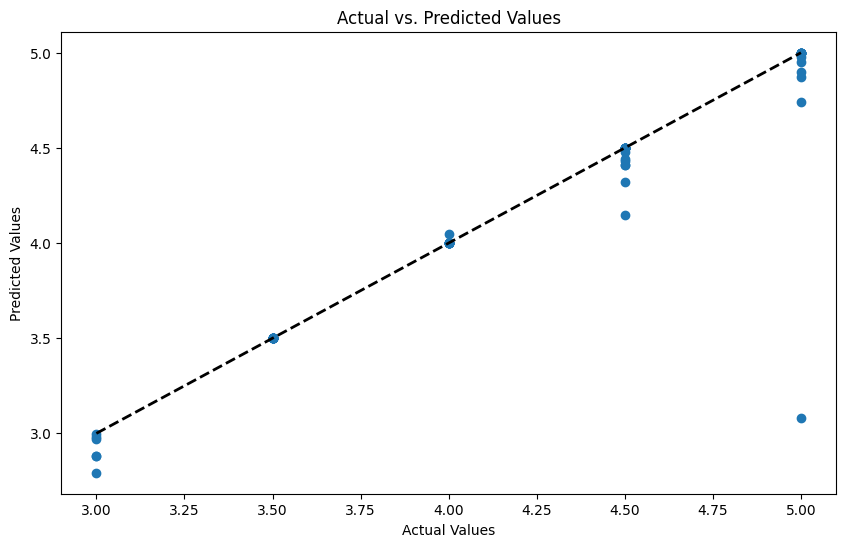

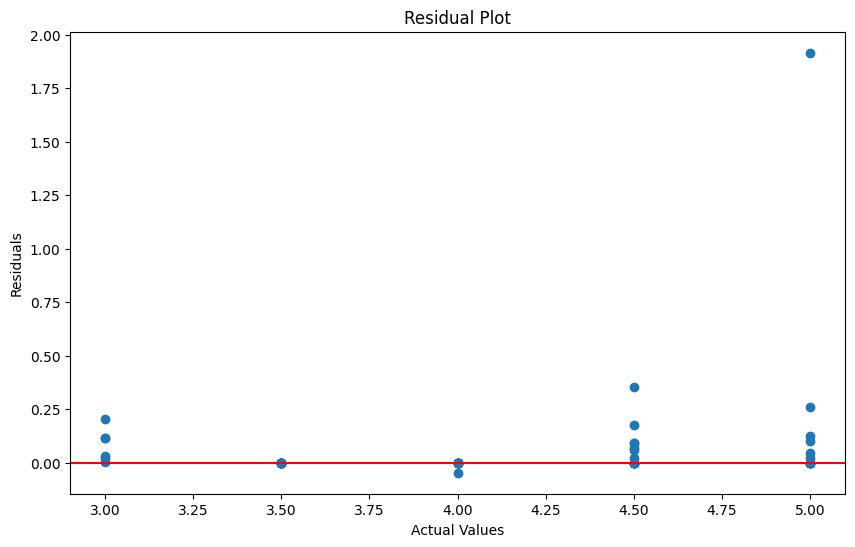

In [5]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Add y=x line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.show()

# Residual plot
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Give Recommendations to Users Based on Their Preferences

## load unrated songs

In [6]:
sources_ids = [
    "37i9dQZEVXcToZ9oox3nki",
    "37i9dQZF1DWZdLqpoFOt65",
    "37i9dQZEVXbn0l6flXloCt",
    "37i9dQZF1DWW1yuCSjnKtM",
    "22mm5J4DcucnRDLv0BAvti",
    "1h419AHuvIuFXjUjndFC25",
    "0gqrnk12Q8OExuCeKyBRCq",
    "3wXgQJZudZsz7RGyPMTQGa"
]
# discover weekly
# for you.
# release radar
# !!!
# discover weekly (cash)
# discovered weekly (trending.)
# BEST SONGS OF ALL TIME
# best tracks from the top albums of all time - RYM (RateYourMusic)

In [22]:
import os
from utils import fetch_all_playlist_tracks

# Load rated songs if exists
rated_songs = pd.read_csv('rated.csv') if os.path.exists('rated.csv') and os.path.getsize('rated.csv') > 0 else pd.DataFrame()

# Load unrated songs if exists
unrated_songs = pd.read_csv('unrated.csv') if os.path.exists('unrated.csv') and os.path.getsize('unrated.csv') > 0 else pd.DataFrame()

tracks = []

for playlist_id in sources_ids:
    playlist_tracks = fetch_all_playlist_tracks(playlist_id)
    track_ids = [t['track']['id'] for t in playlist_tracks if t['track'] is not None and 'id' in t['track'] and t['track']['id'] not in rated_songs['id'].values and t['track']['id'] is not None]

    # Get audio features for each track
    for i in range(0, len(track_ids), 100):
        try:
            audio_features_list = sp.audio_features(track_ids[i:i+100])
        except Exception as e:
            print(f"Error: {e}")
            continue
        
        for track, audio_features in zip(playlist_tracks[i:i+100], audio_features_list):
            track = track['track']
            
            # Skip if the track is None or if 'id' key doesn't exist in track
            if track is None or 'id' not in track:
                continue
            
            # Skip if song is either already rated
            if 'id' in rated_songs.columns and track['id'] in rated_songs['id'].values:
                continue
            
            # Append track details and audio features to the list
            tracks.append({
                'id': track['id'],
                'name': track['name'],
                'artist': track['artists'][0]['name'],
                'album': track['album']['name'],
                'release_date': track['album']['release_date'],
                'duration_ms': track['duration_ms'],
                'popularity': track['popularity'],
                **audio_features
            })
            
print(f"\n Processed {len(tracks)} tracks")

# Convert to DataFrame and save to CSV
tracks_df = pd.DataFrame(tracks)
tracks_df.to_csv("unrated.csv", index=False)

Fetching tracks from 'Discover Weekly' by Spotify
Fetching tracks from 'for you.' by Spotify
Fetching tracks from 'Release Radar' by Spotify
Fetching tracks from '!!!' by Spotify


KeyboardInterrupt: 

## recommend songs

In [8]:
# Set display options
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', 199)  # or 199

# Load data of unrated songs
unrated_songs = pd.read_csv('unrated.csv')

# Keep a copy of song names, artist, album, and id
song_data = unrated_songs[["name", "artist", "album", "id"]]

# Preprocess data
unrated_songs = unrated_songs.dropna()  # Drop rows with missing values
unrated_songs = pd.get_dummies(unrated_songs.drop(["name", "artist", "album", "id"], axis=1))  # One-hot encode categorical data excluding song data

# Make sure the unrated songs data has the same columns as the training data
missing_cols = set(X_train.columns) - set(unrated_songs.columns)
missing_df = pd.DataFrame(0, index=unrated_songs.index, columns=list(missing_cols))
unrated_songs = pd.concat([unrated_songs, missing_df], axis=1)
unrated_songs = unrated_songs[X_train.columns]

# Predict ratings of unrated songs
predicted_ratings = best_rf.predict(unrated_songs)

# Add predicted ratings and song data to unrated songs data
unrated_songs['predicted_rating'] = predicted_ratings
unrated_songs = pd.concat([unrated_songs, song_data], axis=1)

# Create Spotify link using the song's ID
unrated_songs['spotify_link'] = 'https://open.spotify.com/track/' + unrated_songs['id']

# Recommend the top 10 songs with the highest predicted ratings
recommended_songs = unrated_songs.nlargest(10, 'predicted_rating')

# Reset index and print recommended songs
recommended_songs = recommended_songs.reset_index(drop=True)

# Display the table
recommended_songs[["name", "artist", "album", "spotify_link", "predicted_rating"]]

,name,artist,album,spotify_link,predicted_rating
0,Bohemian Rhapsody - Remastered 2011,Queen,A Night At The Opera (2011 Remaster),https://open.spotify.com/track/1AhDOtG9vPSOmsWgNW0BEY,2.973333
1,Femme Fatale,The Velvet Underground,The Velvet Underground & Nico 45th Anniversary,https://open.spotify.com/track/3PG7BAJG9WkmNOJOlc4uAo,2.973333
2,All I Need,Radiohead,In Rainbows,https://open.spotify.com/track/51ygW389BW4Dut3B69pSwc,2.973333
3,You Never Give Me Your Money - Remastered 2009,The Beatles,Abbey Road (Remastered),https://open.spotify.com/track/1jOLTO379yIu9aMnCkpMQl,2.973333
4,Golden Slumbers - Remastered 2009,The Beatles,Abbey Road (Remastered),https://open.spotify.com/track/01SfTM5nfCou5gQL70r6gs,2.973333
5,Two-Headed Boy Pt. 2,Neutral Milk Hotel,In the Aeroplane Over the Sea,https://open.spotify.com/track/6lnZW2wFfcTABaoRJUgMyx,2.973333
6,Lovethepain,Tommy Ice,Lovethepain,https://open.spotify.com/track/2wNbXBxvf4FfirvKpTEFPQ,2.970000
7,Chasing Cars,Snow Patrol,Up To Now,https://open.spotify.com/track/7ctRAoCbcpOusbm3w3E6mn,2.970000
8,Clocks,Coldplay,A Rush of Blood to the Head,https://open.spotify.com/track/0BCPKOYdS2jbQ8iyB56Zns,2.970000
9,Break Me,Silva Lining Band,Lisboa,https://open.spotify.com/track/382OOwDfeNRwYTChvHtvVU,2.970000


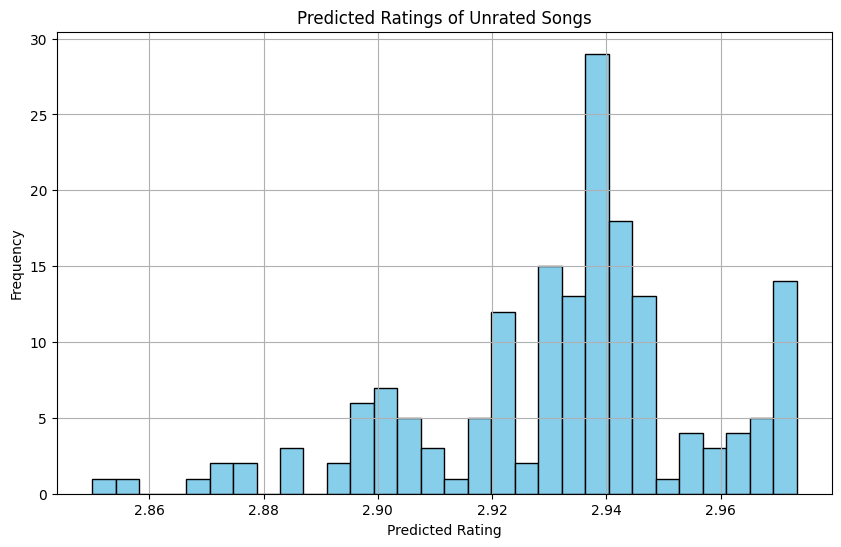

In [9]:
# Load data of unrated songs
unrated_songs = pd.read_csv('unrated.csv')

# Keep a copy of song names, artist, album, and id
song_data = unrated_songs[["name", "artist", "album", "id"]]

# Preprocess data
unrated_songs = unrated_songs.dropna()  # Drop rows with missing values
unrated_songs = pd.get_dummies(unrated_songs.drop(["name", "artist", "album", "id"], axis=1))  # One-hot encode categorical data excluding song data

# Make sure the unrated songs data has the same columns as the training data
missing_cols = set(X_train.columns) - set(unrated_songs.columns)
missing_df = pd.DataFrame(0, index=unrated_songs.index, columns=list(missing_cols))
unrated_songs = pd.concat([unrated_songs, missing_df], axis=1)
unrated_songs = unrated_songs[X_train.columns]

# Predict ratings of unrated songs
predicted_ratings = best_rf.predict(unrated_songs)

# Add predicted ratings and song data to unrated songs data
unrated_songs['predicted_rating'] = predicted_ratings
unrated_songs = pd.concat([unrated_songs, song_data], axis=1)

# Plot a graph of the predicted ratings
plt.figure(figsize=(10, 6))
plt.hist(unrated_songs['predicted_rating'], bins=30, color='skyblue', edgecolor='black')
plt.title('Predicted Ratings of Unrated Songs')
plt.xlabel('Predicted Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()